## Lab-2.2: PyTorch Multi-class classification 

In this lab we perform multi-class classification with a dense feed forward ANN using the News-wire data-set using `PyTorch` **NOT** `Keras`. 

* For reference: the included PDF shows you how to do this in Keras, your job is to reproduce this workflow in `PyTorch`
  * [click here for reference PDF](news-wire.pdf)
  * You can use Keras to get the data, but NOT to train the ANN

**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**Instructions** 

* Code Multi-class classification using a deep feed forward fully connected Neural network
  * Use a dense feed forward ANN model
  * **You only need to do this week's example with PyTorch (i.e. no Keras)**
  * Normalize the data if needed
  * Visualize the results at the end where possible
  * Partition data into training, validation, and test
  * Monitor training and validation throughout training by plotting
  * Print training, validation, and test errors at the very end
  * You `MUST` use early stopping: (if you use code from the internet, make sure you understand it and provide a URL)
  * Do basic `MANUAL` hyper-parameter tuning to try to achieve an optimal fit model
    * i.e. best training/validation loss without over-fitting
    * Explore L1 and L2 regularization and dropout
    * Explore different optimizers 
    * Use the loss functions specified in the textbook
    * Explore different options for activation functions, network size/depth, etc
* **Document what is going on in the code, as needed, with narrative markdown text between cells.**
* *Submit the version with hyper parameters that provide the optimal fit*
  * i.e. you don't need to show the outputs of your hyper-parameter tuning process


In [1]:
from  keras.datasets import reuters

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [4]:
#print shape of data
print(f"x train shape: {x_train.shape}, y train shape: {y_train.shape}")
print(f"x test shape: {x_test.shape}, y test shape: {y_test.shape}")

x train shape: (8982,), y train shape: (8982,)
x test shape: (2246,), y test shape: (2246,)


In [5]:
#print the head of x_train  and y_train
print(f"x_train head: {x_train[:3]}")
print(f"y_train head: {y_train[:3]}")

x_train head: [list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 8

In [6]:
#vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

#print shapes
print(f"x train shape: {x_train.shape}, x test shape: {x_test.shape}")
#print head of x_train
print(f"x_train head: {x_train[:3]}")

x train shape: (8982, 10000), x test shape: (2246, 10000)
x_train head: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

#print shapes
print(f"y train shape: {y_train.shape}, y test shape: {y_test.shape}")
#print head of y_train
print(f"y_train head: {y_train[:3]}")

y train shape: (8982, 46), y test shape: (2246, 46)
y_train head: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
import torch.nn as nn
import torch.nn.functional as F

input_size = 10000
hidden_sizes = 64
output_size = 46
lr = 0.0001
dropout = 0.3
l2 = 0.001

class NewsClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NewsClassifier, self).__init__()
        #add in dropout layer
        self.dropout = nn.Dropout(dropout)
        #first hidden layer, reduce to 64
        self.fc1 = nn.Linear(input_size, hidden_sizes)
        #second hidden layer
        self.fc2 = nn.Linear(hidden_sizes, hidden_sizes)
        #output layer, reduce 64 to 46 label classes
        self.fc3 = nn.Linear(hidden_sizes, output_size)

    def forward(self, x):
        #forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

In [9]:
from torch.utils.data import DataLoader, TensorDataset, random_split

#convert to tensors
x_train_tensor = torch.FloatTensor(x_train)
y_train_tensor = torch.LongTensor(np.argmax(y_train, axis=1))  #one hot to index
x_test_tensor = torch.FloatTensor(x_test)
y_test_tensor = torch.LongTensor(np.argmax(y_test, axis=1))

#create dataset
dataset = TensorDataset(x_train_tensor, y_train_tensor)

#split dataset randomly with random_split from torch
train_size = int(len(dataset) * 0.8)
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#create dataloaders
train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=True)


In [10]:
from torch.optim import Adam

model = NewsClassifier(input_size, hidden_sizes, output_size)
optimizer = Adam(model.parameters(), lr=lr, weight_decay=l2)
criterion = nn.NLLLoss()

#set early stopping parameters
no_improve = 0 #number of epochs with no improvement
min_val_loss = np.inf #initialize minimum validation loss
early_stop_limit = 5 #stop after 3 epochs with no improvement

#holder for validation and training loss visualization
train_losses = []
val_losses = []

for epoch in range(250): #shouldnt actually go for this many epochs due to early stopping
    train_loss = 0
    #training phase
    model.train()
    for data, target in train_loader:
        #zero the gradients
        optimizer.zero_grad()
        #forward pass
        output = model(data)
        #calculate loss
        loss = criterion(output, target)
        #backward pass
        loss.backward()
        #update weights
        optimizer.step()
        #accumulate loss
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    #print(f'Epoch {epoch}, Training Loss: {train_loss}')
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {train_loss}')

    #validation phase
    val_loss = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            val_loss += criterion(output, target).item()
            total += data.size(0)

    val_loss /= len(val_loader)
    #print(f'Epoch {epoch}, Validation Loss: {val_loss}')
    val_losses.append(val_loss)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Validation Loss: {val_loss}')

    #early stopping check
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        no_improve = 0
    else:
        no_improve += 1
        if no_improve == early_stop_limit:
            print("Early stopping triggered")
            break


Epoch 0, Training Loss: 3.7924938201904297
Epoch 0, Validation Loss: 3.7750680446624756
Epoch 10, Training Loss: 3.296995520591736
Epoch 10, Validation Loss: 3.272668957710266
Epoch 20, Training Loss: 2.414753258228302
Epoch 20, Validation Loss: 2.4614938497543335
Epoch 30, Training Loss: 1.8124258369207382
Epoch 30, Validation Loss: 1.893106073141098
Epoch 40, Training Loss: 1.5027935355901718
Epoch 40, Validation Loss: 1.6311804056167603
Epoch 50, Training Loss: 1.2735811173915863
Epoch 50, Validation Loss: 1.4818366467952728
Epoch 60, Training Loss: 1.1498590558767319
Epoch 60, Validation Loss: 1.360413908958435
Epoch 70, Training Loss: 1.0223060846328735
Epoch 70, Validation Loss: 1.2996622323989868
Epoch 80, Training Loss: 0.952247753739357
Epoch 80, Validation Loss: 1.216727763414383
Epoch 90, Training Loss: 0.8513280749320984
Epoch 90, Validation Loss: 1.181718647480011
Epoch 100, Training Loss: 0.784607820212841
Epoch 100, Validation Loss: 1.1596477925777435
Epoch 110, Training

In [13]:
print("Training Loss: ", train_losses)
print("Validation Loss: ", val_losses)

Training Loss:  [3.7924938201904297, 3.7646393179893494, 3.7352133989334106, 3.7029181718826294, 3.666347026824951, 3.62566801905632, 3.5729703307151794, 3.521486610174179, 3.4531487226486206, 3.3763405680656433, 3.296995520591736, 3.209697335958481, 3.116269052028656, 3.0208460092544556, 2.919541120529175, 2.829441636800766, 2.7612050473690033, 2.655406415462494, 2.5766036808490753, 2.5090268552303314, 2.414753258228302, 2.3385987877845764, 2.2630138099193573, 2.200671464204788, 2.1394765973091125, 2.0461460053920746, 1.9956768304109573, 1.9633653312921524, 1.9038231819868088, 1.8598863929510117, 1.8124258369207382, 1.7825247645378113, 1.7448936998844147, 1.702238291501999, 1.6737589538097382, 1.6289115250110626, 1.609429657459259, 1.5856243073940277, 1.521643951535225, 1.5454477667808533, 1.5027935355901718, 1.467041328549385, 1.4436132162809372, 1.4327699691057205, 1.3987529873847961, 1.380797952413559, 1.3453817516565323, 1.3371248096227646, 1.3285752087831497, 1.3067371398210526, 

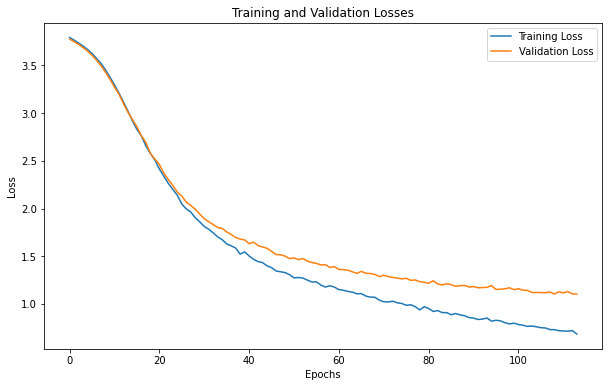

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot([loss for loss in train_losses], label='Training Loss')  #convert tensor to Python number
plt.plot(val_losses, label='Validation Loss')  #val_losses is already a Python list
plt.title('Training and Validation Losses') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()